In [0]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [2]:
print(X.shape)

(1797, 64)


In [3]:
print(y.shape)

(1797,)


In [0]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
Z = StandardScaler().fit_transform(X)

In [0]:
# train set, test set

from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3)

In [6]:
Z_train.shape, y_train.shape

((1257, 64), (1257,))

In [7]:
Z_test.shape, y_test.shape

((540, 64), (540,))

In [0]:
# kNN

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(Z_train,y_train)
pred = knn.predict(Z_test)

In [9]:
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, pred)
print(metrics.confusion_matrix(y_test, pred))

[[48  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  2  0]
 [ 0  0  0 59  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  1  1  0]
 [ 0  0  0  0  0 53  0  0  0  1]
 [ 0  0  0  0  0  0 62  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  5  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  2  1  0 52]]


In [0]:
# Error Function

def error_count_f(matrix):
    right_count = 0
    for i in range(len(matrix)):
        right_count += matrix[i,i]
    error_count = np.sum(matrix) - right_count
    error_rate = error_count/np.sum(matrix)
    print('Error rate : {0:.3f}, Error Count : {1}'.format(error_rate, error_count))
    return error_rate, error_count

In [11]:
# PCA를 적용하지 않은 knn모델의 성능 평가

error_count_f(knn_matrix)

Error rate : 0.028, Error Count : 15


(0.027777777777777776, 15)

In [12]:
from sklearn.decomposition import PCA

model_list = []
error_rate_list = []
error_count_list = []

for num in range(1,Z_train.shape[1])[::-1]:
    pca = PCA(n_components=num)
    proj = pca.fit_transform(Z)
    Z_train, Z_test, y_train, y_test = train_test_split(proj, y, test_size=0.3)
    knn = neighbors.KNeighborsClassifier(n_neighbors=10)
    knn.fit(Z_train, y_train)
    pred = knn.predict(Z_test)
    pca_knn_matrix = metrics.confusion_matrix(y_test, pred)
    print('차원을 {0}으로 축소한 모델'.format(num))
    error_rate, error_count = error_count_f(pca_knn_matrix)
    model_list.append(knn)
    error_rate_list.append(error_rate)
    error_count_list.append(error_count)

차원을 63으로 축소한 모델
Error rate : 0.024, Error Count : 13
차원을 62으로 축소한 모델
Error rate : 0.026, Error Count : 14
차원을 61으로 축소한 모델
Error rate : 0.043, Error Count : 23
차원을 60으로 축소한 모델
Error rate : 0.031, Error Count : 17
차원을 59으로 축소한 모델
Error rate : 0.024, Error Count : 13
차원을 58으로 축소한 모델
Error rate : 0.026, Error Count : 14
차원을 57으로 축소한 모델
Error rate : 0.037, Error Count : 20
차원을 56으로 축소한 모델
Error rate : 0.035, Error Count : 19
차원을 55으로 축소한 모델
Error rate : 0.037, Error Count : 20
차원을 54으로 축소한 모델
Error rate : 0.046, Error Count : 25
차원을 53으로 축소한 모델
Error rate : 0.026, Error Count : 14
차원을 52으로 축소한 모델
Error rate : 0.037, Error Count : 20
차원을 51으로 축소한 모델
Error rate : 0.028, Error Count : 15
차원을 50으로 축소한 모델
Error rate : 0.037, Error Count : 20
차원을 49으로 축소한 모델
Error rate : 0.030, Error Count : 16
차원을 48으로 축소한 모델
Error rate : 0.028, Error Count : 15
차원을 47으로 축소한 모델
Error rate : 0.024, Error Count : 13
차원을 46으로 축소한 모델
Error rate : 0.026, Error Count : 14
차원을 45으로 축소한 모델
Error rate : 0.031, Error Coun

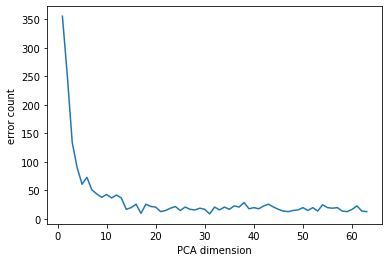

In [13]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,64)[::-1], error_count_list)
plt.xlabel('PCA dimension')
plt.ylabel('error count')
plt.show()

### Discussion

대락적인 수치를 통해 확인해보면 차원을 12개 이하로 축소한 모델부터 정확도가 급격하게 감소하는 것을 확인할 수 있다.